### Exercise

#### Investigate the effect of data scaling (preprocessing.scale()) for the three classifiers we have seen in the lecture (naive Bayes, kNN, logistic regression) and the Wisconsin breast cancer data (load breast cancer).

#### Report any difference in the optimum parameters found by cross-validation and the evaluation results for scaled versus raw data.

#### Shortly explain for the three classifiers, why there is / there isn’t a difference.

1) Several algorithms, for example SVMs, can sometimes converge far faster on normalized data.

2) When your model is sensitive to magnitude, and the units of two different features are different, and arbitrary.  This is like the case you suggest, in which something gets more influence than it should.

3) But of course, not all algorithms are sensitive to magnitude in the way you suggest. Linear regression coefficients will be identical if you do, or don't, scale your data, because it's looking at proportional relationships between them.





In [64]:
%matplotlib inline

import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import neighbors, preprocessing
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

from sklearn.pipeline import Pipeline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, roc_curve, auc

In [65]:
# load data as inputs-outputs
X, y = load_breast_cancer(return_X_y=True)

print(len(X))
print(X)
print("\n......................................................................\n")
print(X[1])
print(len(X[1]))

569
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

......................................................................

[2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
 2.750e-01 8.902e-02]
30


30
30


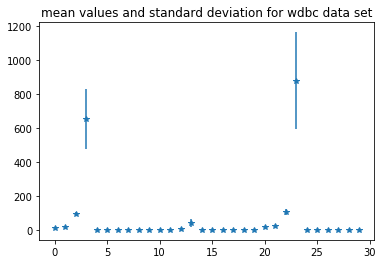

In [66]:
# data are not normalized, so normalize, often better
means = X.mean(axis=0)
#print(sorted(means))
print(len(means))
stds = X.std(axis=0)
print (len(stds))
#print(sorted(stds))
ts = list(range(0,len(means)))
plt.errorbar(ts, means, stds/2, linestyle='None', marker='*')
plt.title("mean values and standard deviation for wdbc data set")
plt.show()

In [67]:
# Split the raw data into train and test set
Xraw_train, Xraw_test, yraw_train, yraw_test = train_test_split(X, y, test_size=0.20, random_state=42)

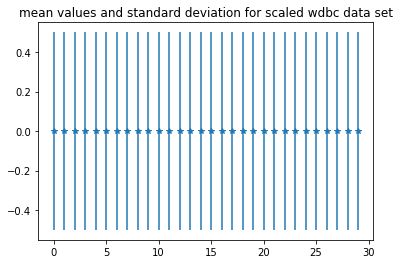

In [68]:
# scaling the data
X_scaled = preprocessing.scale(X)

means = X_scaled.mean(axis=0)
stds = X_scaled.std(axis=0)
ts = list(range(0,len(means)))
plt.errorbar(ts, means, stds/2, linestyle='None', marker='*')
plt.title("mean values and standard deviation for scaled wdbc data set")
plt.show()


In [6]:
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

### Using the scaled data to see the optimum parameters as well as classification results (for kNN classifier)

In [7]:
# first method: kNN classifier for the scaled data
# optimize the metaparameter k by cross-validation

params = {"n_neighbors": np.arange(1, 31, 2),
    "metric": ["euclidean", "cityblock"],
    "algorithm": ["brute"]}
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid=params, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)
best_param = grid.best_params_

print("\n The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
print ("\n")


 The best parameters are {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 1} with a score of 0.96




In [59]:
# For the scaled data
# Now fit the model with optimum parameters for all training data, evaluate on the test set

clf_knn = neighbors.KNeighborsClassifier(best_param['n_neighbors'],metric=best_param['metric'],algorithm=best_param['algorithm'])
clf_knn.fit(X_train,y_train)
eval_train = clf_knn.score(X_train,y_train)
eval_test = clf_knn.score(X_test,y_test)
print("knn: %0.2f training score, %0.2f test score\n" % (eval_train,eval_test))
print("")     

knn: 1.00 training score, 0.94 test score




### Using the raw (unscaled) data to see the optimum parameters as well as classification results (for kNN classifier)

In [60]:
# first method: kNN classifier for the raw data
# optimize the metaparameter k by cross-validation

params = {"n_neighbors": np.arange(1, 31, 2),
    "metric": ["euclidean", "cityblock"],
    "algorithm": ["brute"]}
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid=params, cv=cv, n_jobs=-1)
grid.fit(Xraw_train, yraw_train)
best_param = grid.best_params_

print("\n The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
print ("\n")


 The best parameters are {'algorithm': 'brute', 'metric': 'cityblock', 'n_neighbors': 5} with a score of 0.92




In [61]:
# For the raw data
# Now fit the model with optimum parameters for all training data, evaluate on the test set

clf_knn = neighbors.KNeighborsClassifier(best_param['n_neighbors'],metric=best_param['metric'],algorithm=best_param['algorithm'])
clf_knn.fit(Xraw_train,yraw_train)
eval_train = clf_knn.score(Xraw_train,yraw_train)
eval_test = clf_knn.score(Xraw_test,yraw_test)
print("knn: %0.2f training score, %0.2f test score\n" % (eval_train,eval_test))
print("")     

knn: 0.95 training score, 0.95 test score




### Using the scaled data to see the optimum parameters as well as classification results(for logistic regression with polynomial pre-processing)

In [62]:
# Logistic regression with polynomial preprocessing
# optimize the metaparameter d = degree and C = smoothing by cross-validation

params = {"pre__degree": [1,2,3],
    "regr__solver": ["lbfgs"],
    "regr__C": [0.1, 1, 2]}
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
clf_logreg = Pipeline([('pre',PolynomialFeatures()),('regr',LogisticRegression())])

grid = GridSearchCV(clf_logreg, param_grid=params, cv=cv)
grid.fit(X_train, y_train)
best_param = grid.best_params_

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'pre__degree': 3, 'regr__C': 1, 'regr__solver': 'lbfgs'} with a score of 0.97


In [63]:
# Now,fit the model with optimum parameters for all training data, evaluate on the test set

clf_logreg.set_params(pre__degree = best_param['pre__degree'],regr__solver=best_param['regr__solver'],regr__C=best_param['regr__C'])
clf_logreg.fit(X_train,y_train)
eval_train = clf_logreg.score(X_train,y_train)
eval_test = clf_logreg.score(X_test,y_test)
print("logistic regression: %0.2f training score and %0.2f test score" % (eval_train,eval_test))
print("") 

logistic regression: 1.00 training score and 0.96 test score



### Using the raw (unscaled) data to see the optimum parameters as well as classification results(for logistic regression with polynomial pre-processing)

In [13]:
# Logistic regression with polynomial preprocessing
# optimize the metaparameter d = degree and C = smoothing by cross-validation

params = {"pre__degree": [1,2,3],
    "regr__solver": ["liblinear"],
    "regr__C": [0.1, 1, 2]}
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
clf_logreg = Pipeline([('pre',PolynomialFeatures()),('regr',LogisticRegression(max_iter=500))])

grid = GridSearchCV(clf_logreg, param_grid=params, cv=cv)
grid.fit(Xraw_train, yraw_train)
best_param = grid.best_params_

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'pre__degree': 1, 'regr__C': 1, 'regr__solver': 'liblinear'} with a score of 0.96


In [14]:
# and fit the model with optimum parameters for all training data, evaluate on the test set

clf_logreg.set_params(pre__degree = best_param['pre__degree'],regr__solver=best_param['regr__solver'],regr__C=best_param['regr__C'])
clf_logreg.fit(Xraw_train,yraw_train)
eval_train = clf_logreg.score(Xraw_train,yraw_train)
eval_test = clf_logreg.score(Xraw_test,yraw_test)
print("logistic regression: %0.2f training score and %0.2f test score" % (eval_train,eval_test))
print("") 

logistic regression: 0.96 training score and 0.96 test score



### Using the scaled data to see the optimum parameters as well as classification results (for GaussianNB)

In [15]:
# final method: Gaussian naive Bayes
# no metaparameters to optimize

clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
eval_train = clf_gnb.score(X_train,y_train)
eval_test = clf_gnb.score(X_test,y_test)
print("Gaussian naive Bayes: %0.2f training score and %0.2f test score" % (eval_train,eval_test))
print("") 


Gaussian naive Bayes: 0.94 training score and 0.96 test score



### Using the raw (unscaled) data to see the optimum parameters as well as classification results (for GaussianNB)

In [16]:
# final method: Gaussian naive Bayes
# no metaparameters to optimize

clf_gnb = GaussianNB()
clf_gnb.fit(Xraw_train, yraw_train)
eval_train = clf_gnb.score(Xraw_train,yraw_train)
eval_test = clf_gnb.score(Xraw_test,yraw_test)
print("Gaussian naive Bayes: %0.2f training score and %0.2f test score" % (eval_train,eval_test))
print("") 

Gaussian naive Bayes: 0.94 training score and 0.97 test score



### Evaluating other performance metrics for the above three classifiers (scaled data)

In [17]:
# evaluations beyond the mere accuracy for scaled data
# note that different evaluation measures are
# suited for different settings (2 vs more classes, multilabel, ...)

print("knn")
y_knn = clf_knn.predict(X_test)
y_knn_score = clf_knn.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_knn))
print("")
print("logreg")
y_logreg = clf_logreg.predict(X_test)
y_logreg_score = clf_logreg.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_logreg))
print("")
print("gnb")
y_gnb= clf_gnb.predict(X_test)
y_gnb_score= clf_gnb.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_gnb))
print("")


knn
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.62      1.00      0.77        71

   micro avg       0.62      0.62      0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114


logreg
              precision    recall  f1-score   support

           0       0.62      0.56      0.59        43
           1       0.75      0.79      0.77        71

   micro avg       0.70      0.70      0.70       114
   macro avg       0.68      0.67      0.68       114
weighted avg       0.70      0.70      0.70       114


gnb
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        43
           1       0.00      0.00      0.00        71

   micro avg       0.38      0.38      0.38       114
   macro avg       0.19      0.50      0.27       114
weighted avg       0.14      0.38      0.21       114




/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Evaluating other performance metrics for the above three classifiers (raw (unscaled) data)

In [18]:
# For raw data # Runtime error: overflow encountered

print("knn")
yraw_knn = clf_knn.predict(Xraw_test)
yraw_knn_score = clf_knn.predict_proba(Xraw_test)[:,1]
print(classification_report(yraw_test,yraw_knn))
print("")
print("logreg")
yraw_logreg = clf_logreg.predict(Xraw_test)
yraw_logreg_score = clf_logreg.predict_proba(Xraw_test)[:,1]
print(classification_report(yraw_test,yraw_logreg))
print("")
print("gnb")
yraw_gnb= clf_gnb.predict(Xraw_test)
yraw_gnb_score= clf_gnb.predict_proba(Xraw_test)[:,1]
print(classification_report(yraw_test,yraw_gnb))
print("")

knn
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


logreg
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


gnb
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

   micro avg       0.97      0.97      0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




### Exercise:

#### Extend the text classification example for the 20 newsgroups data set such that
#### • the parameter alpha is optimized by cross-validation
#### • the evaluation also displays other measures than the mere classification accuracy
#### • the result is compared to a default classifier

#### [DOC] Report the results which you achieve when classifying the categories (’rec.autos’, ’rec.motorcycles’) and classifying the categories (’alt.atheism’, ’sci.space’)

In [19]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

 ### For the categories (’rec.autos’, ’rec.motorcycles’) 

In [20]:
# load data, subset of 20 newsgroup data set

from sklearn.datasets import fetch_20newsgroups
categories = ['rec.autos','rec.motorcycles']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

# data are not vectorial yet, define pipeline to 
# compute tf idf and subsequent multinomial naive Bayes 

#alpha = 0 does not work, you can give it a try!
alpha = 1e-2
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
text_clf.set_params(clf__alpha = alpha)


# train on training data, predict test set
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

print("training score %0.2f" % text_clf.score(twenty_train.data, twenty_train.target))
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
print("test score %0.2f" % text_clf.score(twenty_test.data, twenty_test.target))

training score 0.97
test score 0.83


In [21]:
params = {"clf__alpha": np.arange(1e-3, 1e+0, 1)} # varying alpha from 0.001 to 0.10

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid = GridSearchCV(text_clf, param_grid=params, cv=cv)
#grid.fit(X_train, y_train)
grid.fit(twenty_train.data,twenty_train.target)
best_param = grid.best_params_

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'clf__alpha': 0.001} with a score of 0.86


In [22]:
from sklearn import metrics

# setting the best alpha
text_clf.set_params(clf__alpha = 0.001)
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
# Get the test score
print (" The test score for optimized alpha is: ",text_clf.score(twenty_test.data, twenty_test.target))


 The test score for optimized alpha is:  0.8249370277078085


In [23]:
predicted = text_clf.predict(twenty_test.data)
metrics.accuracy_score(twenty_test.target,predicted)
metrics.confusion_matrix(twenty_test.target,predicted) # Getting the confusion matrix

array([[316,  80],
       [ 59, 339]])

In [24]:
metrics.roc_auc_score(twenty_test.target,predicted) # Area under curve score

#print("")

0.8248692959748236

### For categories 'alt.atheism','sci.space'

In [25]:
# load data, subset of 20 newsgroup data set

from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism','sci.space']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

# data are not vectorial yet, define pipeline to 
# compute tf idf and subsequent multinomial naive Bayes 

#alpha = 0 does not work, you can give it a try!
alpha = 1e-2
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
text_clf.set_params(clf__alpha = alpha)


# train on training data, predict test set
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

print("training score %0.2f" % text_clf.score(twenty_train.data, twenty_train.target))
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
print("test score %0.2f" % text_clf.score(twenty_test.data, twenty_test.target))

training score 0.99
test score 0.91


In [26]:
params = {"clf__alpha": np.arange(1e-3, 1e+0, 1)} # varying alpha from 0.001 to 0.10

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid = GridSearchCV(text_clf, param_grid=params, cv=cv)
#grid.fit(X_train, y_train)
grid.fit(twenty_train.data,twenty_train.target)
best_param = grid.best_params_

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'clf__alpha': 0.001} with a score of 0.94


In [27]:
from sklearn import metrics

# setting the best alpha
text_clf.set_params(clf__alpha = 0.001)
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
# Get the test score
print (" The test score for optimized alpha is: ",text_clf.score(twenty_test.data, twenty_test.target))


 The test score for optimized alpha is:  0.9004207573632539


In [28]:
predicted = text_clf.predict(twenty_test.data)
metrics.accuracy_score(twenty_test.target,predicted)
metrics.confusion_matrix(twenty_test.target,predicted) # Getting the confusion matrix

array([[268,  51],
       [ 20, 374]])

In [29]:
metrics.roc_auc_score(twenty_test.target,predicted)

#metrics.f1_score(twenty_test.target,predicted)
#print(classification_report(twenty_test,predicted))
#print("")


0.8946819852648663

### Comparing with default classifier (dummy classifier)

In [30]:
# dummy classifier
from sklearn.dummy import DummyClassifier
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', DummyClassifier()),])


In [31]:
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
# Get the test score
print (" The test score for optimized alpha is: ",text_clf.score(twenty_test.data, twenty_test.target))


 The test score for optimized alpha is:  0.5329593267882188


In [32]:
predicted = text_clf.predict(twenty_test.data)
metrics.accuracy_score(twenty_test.target,predicted)
metrics.confusion_matrix(twenty_test.target,predicted) # Getting the confusion matrix

array([[133, 186],
       [161, 233]])

In [33]:
metrics.roc_auc_score(twenty_test.target,predicted)


0.5041492290310774

### Exercise: 
    
Scikit-learn comes with a benchmark for handwritten digit recognition
(load digits). Try to devise a good classifier for this data set, thereby realising the full
training pipeline.

[DOC] Document your experiments and the results, i.e.

• data: number of data points, number and characteristic of features, number of classes,
preprocessing if any, percentage of train/test split

• classifier description: what is the classification problem, which classifiers do you test,

• metaparameter selection: how is this done, what is the result

• evaluation of the final classifier by suitable evaluation measures including a comparison
to a baseline

In [34]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape


(1797, 8, 8)

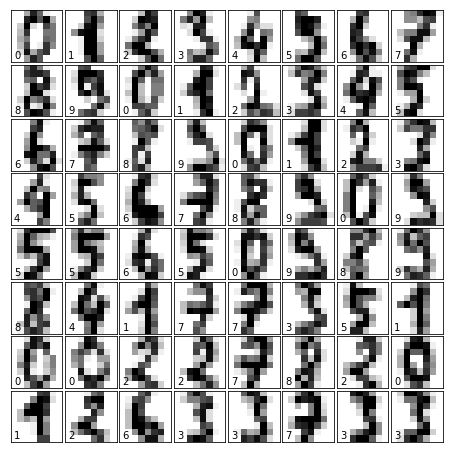

In [35]:
 # set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [36]:
print (digits.images.shape)
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)
print ("number of datapoints: ", len(y))
print ("number of classes: 10")

(1797, 8, 8)
(1797, 64)
(1797,)
number of datapoints:  1797
number of classes: 10


In [37]:
# pixel data of one of the images
print (digits.data[0])
print ("\n")
print ("Number of pixels in one datapoint: ",len(digits.data[0]))

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


Number of pixels in one datapoint:  64


In [38]:
# the labels of the target (classes)
print(digits.target)

[0 1 2 ... 8 9 8]


In [39]:
# Projecting the data into 2D for visualisation
from sklearn.manifold import Isomap #optional
iso = Isomap(n_components = 2)
data_projected = iso.fit_transform(digits.data)
data_projected.shape

(1797, 2)

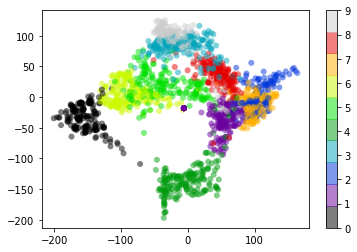

In [40]:
plt.scatter(data_projected[:,0],data_projected[:,1], c= digits.target,edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

### As we can see the points are fairly well separated, so a unsupervised classification model should do the job pretty well.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
print(Xtrain.shape, Xtest.shape)

(1347, 64) (450, 64)


### Starting with LogisticRegression

In [42]:
import timeit
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="liblinear", multi_class="auto")
%time clf.fit(Xtrain,ytrain)
ypred = clf.predict(Xtest)

CPU times: user 181 ms, sys: 5.02 ms, total: 187 ms
Wall time: 186 ms


In [43]:
accuracy_score(ytest,ypred)

0.9666666666666667

In [44]:
print(metrics.confusion_matrix(ytest,ypred))

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  1  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  1  0  0 56  0  0  1  1]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  1  0  0 36  0]
 [ 0  0  0  0  0  0  0  0  3 45]]


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


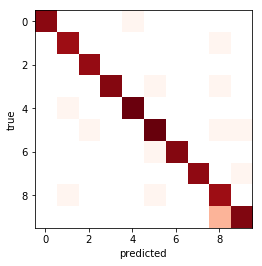

In [45]:
plt.imshow(np.log(metrics.confusion_matrix(ytest,ypred)), 
           cmap = 'Reds',
           interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

### Moving on to GaussianNB

In [46]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
%time clf.fit(Xtrain, ytrain)
GaussianNB(priors = None) # class priors are adapted from the data
print ("\n")
# print the training scores
print("training score : %.3f " % clf.score(Xtrain, ytrain))


CPU times: user 4.35 ms, sys: 2.7 ms, total: 7.05 ms
Wall time: 5.09 ms


training score : 0.857 


In [47]:
# Accuracy and test score
ypred = clf.predict(Xtest)
print ("Test score: ",accuracy_score(ytest,ypred))


Test score:  0.8555555555555555


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


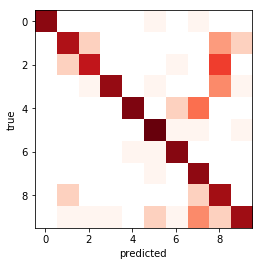

In [48]:
plt.imshow(np.log(metrics.confusion_matrix(ytest,ypred)), 
           cmap = 'Reds',
           interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

### Seeing with Multinomial Naive Bayes

In [49]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
%time clf.fit(Xtrain, ytrain)
MultinomialNB(alpha=1e-2, class_prior=None, fit_prior=True)
print ("\n")
# print the training scores
print("training score : %.3f " % clf.score(Xtrain, ytrain))


CPU times: user 3.22 ms, sys: 0 ns, total: 3.22 ms
Wall time: 2.28 ms


training score : 0.905 


In [50]:
# Accuracy and test score
ypred = clf.predict(Xtest)
print ("Test score: ", accuracy_score(ytest,ypred))

Test score:  0.9155555555555556


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


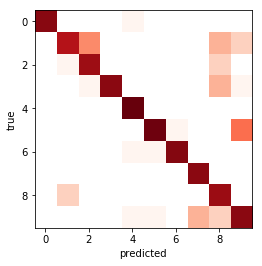

In [51]:
plt.imshow(np.log(metrics.confusion_matrix(ytest,ypred)), 
           cmap = 'Reds',
           interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

### Now comparing with kNN

In [52]:
clf = neighbors.KNeighborsClassifier()
%time clf.fit(Xtrain,ytrain)

# print the training scores
print("training score : %.3f " % clf.score(Xtrain, ytrain))

CPU times: user 3.43 ms, sys: 24 µs, total: 3.46 ms
Wall time: 2.67 ms
training score : 0.989 


In [53]:
# Accuracy and test score
ypred = clf.predict(Xtest)
print ("Test score: ", accuracy_score(ytest,ypred))

Test score:  0.9933333333333333


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


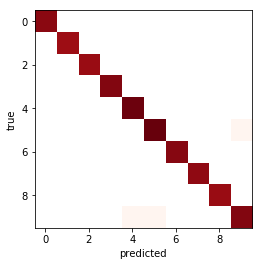

In [54]:
plt.imshow(np.log(metrics.confusion_matrix(ytest,ypred)), 
           cmap = 'Reds',
           interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

### Optimizing the kNN

In [55]:
# first method: kNN classifier for the scaled data
# optimize the metaparameter k by cross-validation

params = {"n_neighbors": np.arange(1, 31, 2),
    "metric": ["euclidean", "cityblock"],
    "algorithm": ["brute"]}
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid=params, cv=cv, n_jobs=-1)
grid.fit(Xtrain, ytrain)
best_param = grid.best_params_

print("\n The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
print ("\n")


 The best parameters are {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 1} with a score of 0.99




In [56]:
# For the scaled data
# Now fit the model with optimum parameters for all training data, evaluate on the test set

clf = neighbors.KNeighborsClassifier(best_param['n_neighbors'],metric=best_param['metric'],algorithm=best_param['algorithm'])
%time clf.fit(Xtrain,ytrain)
eval_train = clf.score(Xtrain,ytrain)
eval_test = clf.score(Xtest,ytest)
print("\n")
print("knn: %0.2f training score, %0.2f test score\n" % (eval_train,eval_test))
print("")     

CPU times: user 1.39 ms, sys: 0 ns, total: 1.39 ms
Wall time: 1.12 ms


knn: 1.00 training score, 0.98 test score




In [57]:
# Accuracy and test score
ypred = clf.predict(Xtest)
accuracy_score(ytest,ypred)

0.9822222222222222

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


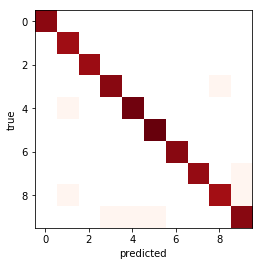

In [58]:
y = metrics.confusion_matrix(ytest,ypred)
y[y == 0] =0.01 # to prevent dividing by zeros
plt.imshow(np.log(y), 
           cmap = 'Reds',
           interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');